#  <p style="text-align: center;">AIRCRASH INVESTIGATION</p>


# FUENTES

### Kaggle:

MihirSethi      
Hay dos datasets aparentemente iguales, hay que mirarlos bien y decidir cuál tiene los datos más completos         
dataset1: Airplane_Crashes_and_Fatalities_Since_1908.csv      
dataset2: aircrash1908-2008.csv  
link: 'https://www.kaggle.com/mihirsethi007/aircrash-data'         
***Fuente Principal***                      
Descripción: Datos de accidentes desde 1908.

*mirar: Código interesante*: https://www.kaggle.com/mihirsethi007/fork-of-air-crash-analysis-1908-2009

### planecrashinfo.com:
Richard Kebabjian  
dataset: web scrapping
link: 'http://www.planecrashinfo.com/database.htm'          
***Fuente Complementaria***                       
Descripción: Datos de accidentes desde 1908, tiene datos diversos, parece ser la fuente desde la que se hizo el dataset de Kaggle. En las tablas de la web no están todos los campos, sin embargo tiene url's con datos agregados por tipo de accidente y otras variables.

### datos.bancomundial.org: 

Organización de Aviación Civil Internacional (OACI)       
dataset: API_IS.AIR.DPRT_DS2_es_csv_v2_2169474.csv       
link: 'https://datos.bancomundial.org/indicator/IS.AIR.DPRT'             
***Fuente Complementaria***                      
Descripción: Número de vuelos por país y año desde 1970 hasta 2019, interesante para comparar accidentes con número total de vuelos

### Airfleets: 

Airfleets.net
dataset: web scrapping
link: https://www.airfleets.es/crash        
***Fuente Complementaria***                      
Descripción: Datos de vuelos con fecha, compañía aérea, modelo de avión, ciudad de origen, país de origen y número de víctimas. Los datos están normalizados. Interesante para análisis por compañía y modelo de avión.

### Estadistica para todos:

Web especializada en estadística
dataset: web image
link:https://www.estadisticaparatodos.es/taller/loterias/loterias.html      
***Fuente Complementaria***                             
Descripción: Lista de probabilidades de que toquen las diferentes loterías.

# LIBRERÍAS:

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
from bs4 import BeautifulSoup
from datetime import timedelta,date,datetime
import time
import random

In [313]:
import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn-bright')

# ÍNDICE


### ANÁLISIS Y LIMPIEZA

- [Kaggle (análisis general)](#kgl)

    * [Campos categóricos](#alc)
    * [Campos numéricos](#aln)

- [planecrashinfo.com (Scraping)](#pci)

- [airfleets.net(Scraping)](#airfleets)

- [bancomundial.org](#bmo)

### [UNIFICACIÓN DE DATOS ENTRE BANCOMUNDIAL.ORG Y EL RESTO DE FUENTES](#ufd)

- [Unificación de datos con dataset Kaggle](#upk)
- [Unificación de datos con dataset planecrashinfo.com](#upci)
- [Unificación de datos con dataset airfleets.net](#ufa)

# Actualizaciones de los csv's procesados

### A medida que iba avanzando iba actualizando los csv's procesados

In [1654]:
#Última actualización del set Kaggle procesado: 23.04.21
#air.to_csv('data/aircrash1908-2008_procesado.csv', index=False)

In [ ]:
#Última actualización del set de PlaneCrahsInfo (extraido por scrapping): 23.04.21
#pci_causes.to_csv('data/pci_causes.csv', index=False)

In [ ]:
#Última actualización del set de Airfleets.net (extraido por scrapping): 23.04.21
#airfleets.to_csv('Data/airfleets_accidents_1967-2019.csv', index=False)

In [ ]:
#Última actualización dataset 1 (cantidad vuelos) bancomundial.org: 23.04.21
#bmfly.to_csv('data/bancomundial_org_flights-country-year_procesado.csv',index = False)

In [1313]:
#Última actualización dataset 2 (personas transportadas) bancomundial.org: 23.04.21
#bmpeople.to_csv('data/bancomundial_org_country-passengers-year_procesado.csv',index = False)

In [1322]:
#Última actualización dataset 3 (población global) bancomundial.org: 23.04.21
#bmpopu.to_csv('data/bancomundial_org_global-population_procesado.csv',index = False)

In [1510]:
#Última actualización dataset 4 (Código País con nivel ingresos) bancomundial.org: 23.04.21
#bmcode.to_csv('data/bancomundial_org_country-code_income-level.csv', index=False)

## ANÁLISIS DATASET KAGGLE <a id="kgl"></a>

In [3]:
#air = pd.read_csv('data/aircrash1908-2008.csv', encoding = 'latin1')

In [1671]:
air.head()

In [284]:
air.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [316]:
#Hago columna de unos para cálculos posteriores
air['unos'] = 1

### Variables:

- **Date**:	 Date of accident,  in the format - January 01, 2001
- **Time**:	 Local time, in 24 hr. format unless otherwise specified
- **Location**:	 Region and/or Country where the accident took place
- **Operator:**	 Airline or operator of the aircraft
- **Flight #:**	 Flight number assigned by the aircraft operator
- **Route:**	 Complete or partial route flown prior to the accident
- **Type:**	 Aircraft type
- **Registration**	 ICAO registration of the aircraft
- **cn/In:**	 Construction or serial number / Line or fuselage number
- **Aboard:**	 Total aboard (passengers / crew)
- **Fatalities:**	 Total fatalities aboard (passengers / crew)
- **Ground:**	 Total killed on the ground
- **Summary**	 Brief description of the accident and cause if known

In [286]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          5268 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   nFlight       1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [143]:
air.isna().sum()

Date               0
Time            2219
Location          20
Operator          18
nFlight         4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

Text(0.5, 1.0, 'Missing data')

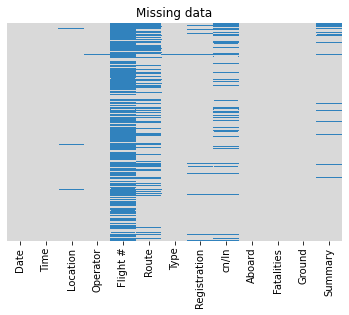

In [1351]:
sns.heatmap(air.isnull(), yticklabels = False, cbar = False, cmap = 'tab20c_r')
plt.title('Missing data')

In [1222]:
air.columns

Index(['Date', 'Time', 'Location', 'Operator', 'nFlight', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary',
       'unos', 'year', 'type_flight', 'country', 'airfleets_operator'],
      dtype='object')

In [1223]:
#Elimino las columnas que no me sirven para nada.
air.drop(['Registration', 'cn/In', 'Flight #'], axis=1,inplace = True)
air.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Route', 'Type', 'Aboard',
       'Fatalities', 'Ground', 'Summary', 'unos', 'year', 'type_flight',
       'country', 'airfleets_operator'],
      dtype='object')

In [344]:
# Me deshago de los Nans en todas las variables categóricas
lista = ['Location','Operator','Route','Type','Summary']
for campo in lista:
    
    air[campo].fillna('Unknown', inplace = True)

# CAMPOS CATEGÓRICOS <a id="alc"></a>

### Analizo campo Date

In [317]:
#Compruebo si hay alguna fecha con formato diferente a MM/DD/AAAA
fechas = air.groupby('Date')[['unos']].sum().sort_values('unos',ascending = False)
fechas['dates'] = fechas.index
fechas['len_dates'] = fechas['dates'].str.len()

In [318]:
# Todas las fechas tienen el mismo formato
fechas.groupby('len_dates')[['dates']].count()

,dates
len_dates,
10,4753


In [326]:
#Hago una columna con el año separado
air['year'] = air['Date'].map(lambda x: str(x[6:]))

In [332]:
#Convierto la columna de solo año a numérica
air['year'] = air['year'].astype('int32')

In [1193]:
#Accidentes antes y a partir de 1970
print(air['year'][air['year']<1970].count())
print(air['year'][air['year']>=1970].count())

2345
2911


In [1670]:
air[air['year']>=1970].groupby('type_flight')[['unos']].sum()

,unos
type_flight,
Commercial,2348.0
Militar,394.0
Service,169.0


### Analizo campo Time

In [1199]:
# Todos tienen la misma estructura MM/DD/AAAA HH:MM
# En realidad en campo Time es igual que el de fecha pero añadiendo la hora, 
# aunque está en formato str.
air['Time'].value_counts()

09/17/1929 00:00    3
09/30/1975 00:00    3
01/25/1947 00:00    3
02/28/1973 00:00    3
05/11/1990 00:00    3
                   ..
12/14/1988 21:50    1
11/10/1933 00:00    1
09/12/1977 00:12    1
07/08/2007 13:00    1
01/13/1984 00:00    1
Name: Time, Length: 5136, dtype: int64

In [1221]:
'''
2212 registros tienen la hora 00:00, lo que hace suponer que, aunque puede ser que en 
algunos coincida, lo más probable es que no hubiera registro de hora y al definir el
formato MM/DD/AAA HH:MM se pusiera el 00:00 automáticamente

Analizando desde 1970, 1/3 de los accidentes están registrados a las 00:00h
lo cuál es más que improbable

No es un valor fiable para análisis
'''
print('Con hora 00:00:',air['Time'].str.contains('00:00').sum())
print('Sin hora 00:00:',air.shape[0] - air['Time'].str.contains('00:00').sum())
print('Con hora 00:00 desde 1970:',
       air.loc[(air['Time'].str.contains('00:00'))&(air['year']>=1970)].shape[0])


Con hora 00:00: 2212
Sin hora 00:00: 3044
Con hora 00:00 desde 1970: 985


In [ ]:
#Hago una columna date2 con los valores str de columna Time, pero con formato fecha
#para poder usar librería con las fechas

In [1379]:
#Hago una función para transformar a formato fecha la columna Time
def format_fecha(x):
    return datetime.strptime(x,"%m/%d/%Y %H:%M")

In [1380]:
#Hago una segunda columna de fecha (date2) con la fecha en formato fecha
air['date2']= air['Time'].apply(format_fecha)

In [1381]:
air.head()
print(type(air.loc[0,'date2']))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [1383]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5256 entries, 0 to 5255
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                5256 non-null   object        
 1   Time                5256 non-null   object        
 2   Location            5256 non-null   object        
 3   Operator            5256 non-null   object        
 4   Route               5256 non-null   object        
 5   Type                5256 non-null   object        
 6   Aboard              5246 non-null   float64       
 7   Fatalities          5256 non-null   float64       
 8   Ground              5256 non-null   float64       
 9   Summary             5256 non-null   object        
 10  unos                5256 non-null   int64         
 11  year                5256 non-null   int64         
 12  type_flight         5256 non-null   object        
 13  country             4723 non-null   object      

### Analizo el campo OPERATOR para ver si voy  a poder analizar en este df por compañía aérea

In [406]:
#Separo Militares de comerciales
air.groupby('Operator')[['unos']].sum().sort_values('unos',ascending = False)

,unos
Operator,
Aeroflot,179
Military - U.S. Air Force,176
Air France,69
Deutsche Lufthansa,65
Air Taxi,44
...,...
Everest Air,1
Europe Aero Service EAS,1
Eurojet Italila,1


In [415]:
#Creo columna para separar militar/servicio/comercial y privado

#Compruebo si hay registros que contengan Militar y Service en el campo Operator
air.loc[(air['Operator'].str.contains('Service'))&(air['Operator'].str.contains('Militar')),:]
#Hay 2, claramente son militares así que primero hago la modificación de los de Service
#Y después Military, de esa forma estos dos finalmente quedan como Militares

air['type_flight'] = 'empty'
air.loc[air['Operator'].str.contains('Service'),'type_flight'] = 'Service'
air.loc[air['Operator'].str.contains('Militar'),'type_flight'] = 'Militar'
air.loc[air['type_flight']=='empty','type_flight'] = 'Commercial'

In [416]:
air.groupby('type_flight')[['unos']].sum()

,unos
type_flight,
Commercial,4231
Militar,779
Service,246


In [1140]:
#Una vez que tengo el tipo en un campo aparte, quito la cadena 'Military - '
#de la columna Operator

air['Operator'] = air['Operator'].apply(lambda x: x.replace('Military - ',''))

In [1142]:
#Hay 2471 valores únicos en campo 'Operator'
len(air['Operator'].unique())

2471

In [1146]:
#Hay 1809 valores únicos en campo 'Operator'a partir de 1970, lo que supone el 62%
len(air.loc[air['year']>=1970,'Operator'].unique())

1809

In [1150]:
sorted(air.loc[air['year']>=1970,'Operator'].unique().tolist())

In [1152]:
#Del Dataset AIRFLEETS, donde están las compañias bien introducidas, compruebo
#cuántos valores únicos hay
len(airfleets['airline'].unique())

295

In [1167]:
#Hay 1231 registros del dataset Kaggle que tienen la compañía según está escrita
#en Airfleets, creo una columna en air de Kaggle con el valor del operador en Airfleets.

air['airfleets_operator'] = ''
listado = airfleets['airline'].unique()

for i in range(len(air['Operator'])):
    for j in range(len(listado)):
        if listado[j] in air.loc[i,'Operator']:
            air.loc[i,'airfleets_operator'] = listado[j]

In [1198]:
'''
Compruebo y hay 1146 registros en los que se pueda analizar 
por compañía aérea, de los cuáles 1110 son vuelos comerciales.

A partir de 1970 son 583, lo que supone solo el 20% de los registros


Son muy pocos como para hacer un análisis fiables
'''

print('registros con operador:',len(air[air['airfleets_operator']!='']))
print('comerciales:',len(air[(air['airfleets_operator']!='')&(air['type_flight']=='Commercial')]))
print('A partir 1970:',len(air[(air['airfleets_operator']!='')&(air['year']>= 1970)]))


registros con operador: 1146
comerciales: 1110
A partir 1970: 583


In [1392]:
#Quito los Nans de la columna y sustytuyo por Unknown
air['airfleets_operator'] = air['airfleets_operator'].fillna('Unknown')


### Analizo el campo ROUTE para ver si voy a poder analizar por trayectos

In [235]:
#Compruebo cuáles son las rutas que más se repiten
air.groupby('Route')[['unos']].sum().sort_values('unos',ascending = False).head(10)

,unos
Route,
Unknown,1706
Training,81
Sightseeing,29
Test flight,17
Test,6
Sao Paulo - Rio de Janeiro,5
Villavicencio - Mitu,4
Bogota - Barranquilla,4
Saigon - Paris,4


In [88]:
# count de registros que en Location tienen 'origen - destino'
air['Route'].isnull().sum()

1706

In [224]:
# Los Nans de Route los paso a 'Unknown'
air['Route'].fillna('Unknown', inplace = True)

In [1192]:
#Hay 3360 vuelos con ruta de los cuáles 2918 son comerciales
air[(air['Route'].str.contains('-'))& (air['type_flight']=='Commercial')].shape[0]

2918

In [169]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          5268 non-null   object 
 2   Location      5268 non-null   object 
 3   Operator      5268 non-null   object 
 4   nFlight       5268 non-null   object 
 5   Route         5268 non-null   object 
 6   Type          5268 non-null   object 
 7   Registration  5268 non-null   object 
 8   cn/In         5268 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       5268 non-null   object 
 13  unos          5268 non-null   int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 576.3+ KB


In [168]:
air.groupby('Type')[['unos']].sum().sum()#.sort_values('unos',ascending = False).head(50)

unos    5268
dtype: int64

### Analizo campo SUMMARY a ver si puedo extraer la causa del accidente

In [1324]:
'''
Para evaluar si voy a poder incluir hipótesis relativas a la causa del accidente,
hago un diccionario y una lista con las causas, por si lo puedo usar después.

La fuente es una url dentro del propio planecrahsinfo: 
http://www.planecrashinfo.com/cause.htm
'''

#Causas de accidente en un diccionario
dicausa = {'PILOT ERROR':['Improper procedure', 'Flying VFR into IFR conditions',
                          'Controlled flight into terrain','Descending below minima',
                          'Spatial disorientation', 'Premature descent','Excessive landing speed',
                          'Missed runway','Fuel starvation','Navigation error',
                          'Wrong runway takeoff/landing','Midair collision caused by primary pilot'],
           'MECHANICIAL':['Engine failure','Equipment failure','Structural failure','Design flaw'],
           'WEATHER':['Severe turbulence','Windshear','Mountain wave','Poor visibility','Heavy rain',
                      'Severe winds','Icing','Thunderstorms','Lightning strike'],
           'SABOTAGE':['Hijacking','Shot down','Explosive device aboard','Pilot suicide'],
           'OTHER':['ATC error','Ground crew error','Overloaded','Improperly loaded cargo',
                    'Bird strike','Fuel contamination','Pilot incapacitation','Obstruction on runway',
                    'Midair collision caused by other aircraft',
                    'Fire/smoke in flight (cabin, cockpit, cargo hold)','Maintenance error']
          }

#Causas de accidente en una lista
listcausa = ['Improper procedure', 'Flying VFR into IFR conditions',
             'Controlled flight into terrain','Descending below minima',
             'Spatial disorientation', 'Premature descent','Excessive landing speed',
             'Missed runway','Fuel starvation','Navigation error',
             'Wrong runway takeoff/landing','Midair collision caused by primary pilot',
             'Engine failure','Equipment failure','Structural failure','Design flaw',
             'Severe turbulence','Windshear','Mountain wave','Poor visibility','Heavy rain',
             'Severe winds','Icing','Thunderstorms','Lightning strike',
             'Hijacking','Shot down','Explosive device aboard','Pilot suicide',
             'ATC error','Ground crew error','Overloaded','Improperly loaded cargo',
             'Bird strike','Fuel contamination','Pilot incapacitation','Obstruction on runway',
             'Midair collision caused by other aircraft',
             'Fire/smoke in flight (cabin, cockpit, cargo hold)','Maintenance error']

In [1338]:
#busco los valores de la lista de causas en el campo 'Summary'
#y si los encuentra los pongo en un campo nuevo
air['pci_accident_cause'] = ''

for causa in listcausa:
    
    air.loc[air['Summary'].str.contains(causa),'pci_accident_cause'] = causa  

In [1393]:
#Le quito los Nans por Unknown
air['pci_accident_cause'] = air['pci_accident_cause'].fillna('Unknown')

In [1394]:
air.head()

,Date,Time,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary,unos,year,type_flight,country,airfleets_operator,pci_accident_cause,date2,fatal_ratio
0,09/17/1908,09/17/1908 17:18,"Fort Myer, Virginia",U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1,1908,Militar,United States,Unknown,Unknown,1908-09-17 17:18:00,0.5
1,07/12/1912,07/12/1912 06:30,"AtlantiCity, New Jersey",U.S. Navy,Test flight,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1,1912,Militar,United States,Unknown,Unknown,1912-07-12 06:30:00,1.0
2,08/06/1913,08/06/1913 00:00,"Victoria, British Columbia, Canada",Private,Unknown,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1,1913,Commercial,Canada,Unknown,Unknown,1913-08-06 00:00:00,1.0
3,09/09/1913,09/09/1913 18:30,Over the North Sea,German Navy,Unknown,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1,1913,Militar,NaN,Unknown,Unknown,1913-09-09 18:30:00,0.7
4,10/17/1913,10/17/1913 10:30,"Near Johannisthal, Germany",German Navy,Unknown,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1,1913,Militar,Germany,Unknown,Unknown,1913-10-17 10:30:00,1.0


In [1347]:
'''
Dado que es un campo con texto sin orden definido, encuentro solamente
322 registros en los que está el texto literal, por lo que no me va a servir
para hacer este análisis en el dataset de Kaggle.
'''

air[air['pci_accident_cause']!=''].groupby('pci_accident_cause')[['unos']].sum().sum()

unos    322
dtype: int64

In [1415]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5256 entries, 0 to 5255
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                5256 non-null   object        
 1   Time                5256 non-null   object        
 2   Location            5256 non-null   object        
 3   Operator            5256 non-null   object        
 4   Route               5256 non-null   object        
 5   Type                5256 non-null   object        
 6   Aboard              5246 non-null   float64       
 7   Fatalities          5256 non-null   float64       
 8   Ground              5256 non-null   float64       
 9   Summary             5256 non-null   object        
 10  unos                5256 non-null   int64         
 11  year                5256 non-null   int64         
 12  type_flight         5256 non-null   object        
 13  country             5256 non-null   object      

# Analizo Campo Type

In [ ]:
'''
En este campo está el fabricante y el tipo de avión, salen 2445 valores únicos
pero en todos el fabricante está al principio.

Para ahorrar tiempo exporto a csv esta lista y visualmente, en excel, hago un campo
con el fabricante. Además añado si es helicóptero o Avión y añado también el país

Es necesario, ya que muchas de las hipótesis planteadas se solucionan con la información
de este campo.

Es importante matizar que el campo Location, del set de Kaggle, del que he extraido el país
se refiere al país en el que se produjo el accidente.

Este campo manufacturer_country es el país del fabricante del avión accidentado
'''

In [1421]:
# Aparecen 2445 valores únicos
mfacturer = air.groupby('Type')[['unos']].count().sort_values('unos',ascending = False)
mfacturer.shape

(2445, 1)

In [1419]:
mfacturer.to_csv('data/manufacturers_before.csv')

In [ ]:
#Aquí continúo con el campo Type una vez acabada la modificación en el excel
manufacturer = pd.read_csv('data/manufacturers_after.csv', sep = ';',encoding = 'latin1')

In [1436]:
manufacturer.head()

,Type,aircraft_manufacturer,aircraft_tipe,manufacturer_country
0,AÃÂÃÂ©rospatiale SE-210 Caravelle,Aerospatiale,Helicopter,France
1,AÃÂÃÂ©rospatiale/Aeritalia ATR-72-202,Aerospatiale,Airplane,France
2,AAC-1 Toucan,AAC,Airplane,France
3,AEGK,AEGK,Airplane,United Kingdom
4,Aermacchi MB-339PAN (3 aircraft),Aermacchi,Airplane,Italy


In [1559]:
#Junto los dos df's, que tienen el campo Type como nexo
air=pd.merge(air, manufacturer, how = 'outer')

In [1470]:
air.info()

In [1465]:
#Al hacer el merge, me crea nuevos registros inexistentes en el inicial sontodos índices
#nuevos
air[air['Date'].isnull()]

In [1464]:
##Los borro
air = air[air['Date'].notna()]
air.info()

In [1471]:
# Transformo los pocos nans de los nuevos campos a 'Unknown'
lista = ['aircraft_manufacturer','aircraft_tipe','manufacturer_country']
for campo in lista:
    
    air[campo].fillna('Unknown', inplace = True)

In [1472]:
air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5256 entries, 0 to 5255
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   5256 non-null   object        
 1   Time                   5256 non-null   object        
 2   Location               5256 non-null   object        
 3   Operator               5256 non-null   object        
 4   Route                  5256 non-null   object        
 5   Type                   5256 non-null   object        
 6   Aboard                 5246 non-null   float64       
 7   Fatalities             5256 non-null   float64       
 8   Ground                 5256 non-null   float64       
 9   Summary                5256 non-null   object        
 10  unos                   5256 non-null   float64       
 11  year                   5256 non-null   float64       
 12  type_flight            5256 non-null   object        
 13  cou

# VARIABLES NUMÉRICAS <a id="aln"></a>

In [245]:
# las columnas unos y len_time son creadas para diversos análisis
# las que importan son Aboard, Fatalities y Ground
air.describe()

,Aboard,Fatalities,Ground,unos,len_time
count,5246.000000,5256.000000,5246.000000,5268.0,5268.000000
mean,27.554518,20.068303,1.608845,1.0,5.842445
std,43.076711,33.199952,53.987827,0.0,0.987604
min,0.000000,0.000000,0.000000,1.0,5.000000
25%,5.000000,3.000000,0.000000,1.0,5.000000
50%,13.000000,9.000000,0.000000,1.0,5.000000
75%,30.000000,23.000000,0.000000,1.0,7.000000
max,644.000000,583.000000,2750.000000,1.0,7.000000


In [246]:
#Hay un outlayer claro en Ground, compruebo y es debido a los atentados del 11s.
air[air['Ground']==2750]

,Date,Time,Location,Operator,nFlight,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,unos,len_time
4803,09/11/2001,08:47,"New York City, New York",American Airlines,11,Boston - Los Angeles,Boeing 767-223ER,N334AA,22332/169,92.0,92.0,2750.0,The aircraft was hijacked shortly after it lef...,1,5
4804,09/11/2001,09:03,"New York City, New York",United Air Lines,175,Boston - Los Angeles,Boeing B-767-222,N612UA,21873/41,65.0,65.0,2750.0,The aircraft was hijacked shortly after it lef...,1,5


In [367]:
#Hago una lista con los índices de los registros que no tienen datos
# en aboard, fatalities, ground
list(air[(air['Aboard'].isnull()) & (air['Fatalities'].isnull()) & (air['Ground'].isnull())].index)

[26, 333, 364, 423, 537, 570, 571, 573, 593, 678, 768, 4705]

In [368]:
#borro esos 12 registros porque no me sirven para ningún análisis
air.drop([26, 333, 364, 423, 537, 570, 571, 573, 593, 678, 768, 4705],inplace = True)                                              

In [370]:
#compruebo que ya no están
air[(air['Aboard'].isnull()) & (air['Fatalities'].isnull()) & (air['Ground'].isnull())]

,Date,Time,Location,Operator,nFlight,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,unos,year


In [1480]:
#Todavía hay 12 registros en los que el valor de Aboard es Nan o 0, 
air[(air['Aboard'].isnull()) | (air['Aboard']==0)]

,Date,Time,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary,...,year,type_flight,country,airfleets_operator,pci_accident_cause,date2,fatal_ratio,aircraft_manufacturer,aircraft_tipe,manufacturer_country
416,03/07/1935,03/07/1935 00:00,"Schievelbein, Germany",Deruluft,Unknown,Rochrbach Roland,NaN,3.0,0.0,Fuselage failure.,...,1935.0,Commercial,Germany,Unknown,Unknown,1935-03-07 00:00:00,NaN,Rochrbach,Airplane,Germany
523,09/26/1939,09/26/1939 00:00,North Sea,KLM Royal Dutch Airlines,Stockholm - Amsterdam,Douglas DC-3,NaN,1.0,0.0,One Swedish passenger was killed when the plan...,...,1939.0,Commercial,Unknown,KLM,Unknown,1939-09-26 00:00:00,NaN,Douglas,Airplane,United States
969,08/13/1942,08/13/1942 00:00,"Algiers, Algeria",Air France,Unknown,Liore et Olivier H-246 Air Boat,NaN,4.0,0.0,Attacked by Royal Air Force fighters. Crashed...,...,1942.0,Commercial,Algeria,Air France,Unknown,1942-08-13 00:00:00,NaN,Liore et Olivier,Airplane,France
1447,12/25/1946,12/25/1946 00:00,"Lunghwa, Shanghai, China",China National Aviation Corporation,Unknown,"Curtiss C-46, C-47, DC-3",NaN,87.0,4.0,Various accidents involving three aircraft una...,...,1946.0,Commercial,China,Unknown,Unknown,1946-12-25 00:00:00,NaN,Curtiss-Wright,Airplane,United States
1941,04/20/1957,04/20/1957 00:00,"Jirkouk, Iraq",Air France,"Tehran, Iran - Istanbul, Turkey",Lockheed Super Constellation,NaN,1.0,0.0,Explosive decompression. A passenger was sucke...,...,1957.0,Commercial,Iraq,Air France,Unknown,1957-04-20 00:00:00,NaN,Lockheed Corporation,Airplane,United States
3123,08/11/1982,08/11/1982 00:00,PacifiOcean,Pan American World Airways,Tokyo - Honolulu,Boeing B-747-121,NaN,1.0,0.0,A sixteen-year-old boy was killed when a bomb ...,...,1982.0,Commercial,Unknown,World Airways,Unknown,1982-08-11 00:00:00,NaN,Boeing,Airplane,United States
3461,11/03/1977,11/03/1977 00:00,"Belgrade, Yugoslavia",El Al,Unknown,Boeing B-747,NaN,1.0,0.0,Explosive decompression.,...,1977.0,Commercial,Serbia,El Al,Unknown,1977-11-03 00:00:00,NaN,Boeing,Airplane,United States
3463,02/20/1992,02/20/1992 00:00,En route from Argentina to California,Aerolineas Argentinas,Unknown,Boeing B-747,NaN,1.0,0.0,A passenger died of cholera while en route.,...,1992.0,Commercial,Argentina,Aerolineas Argentinas,Unknown,1992-02-20 00:00:00,NaN,Boeing,Airplane,United States
3973,09/22/1981,09/22/1981 12:00,"Near Babaeski, Turkey",Turkish Air Force,Unknown,Northrop F-5A,0.0,0.0,40.0,The fighter crashed into a village after the p...,...,1981.0,Militar,Turkey,Unknown,Unknown,1981-09-22 12:00:00,NaN,Northrop,Airplane,United States
3991,12/16/1981,12/16/1981 00:00,"Kuala Belait, Brunei",Bristow Helicopters,Unknown,Aerospatiale Puma,NaN,12.0,0.0,Unknown,...,1981.0,Commercial,Unknown,Unknown,Unknown,1981-12-16 00:00:00,NaN,Aerospatiale,Airplane,France


In [1494]:
#Dado que son solo 12, igualo el número de pasajeros al número de víctimas, dado que 
#son solamente 12 registros, no influye de forma relevante en las estadísticas.
air = air.copy()
air.loc[(air['Aboard'].isnull()) | (air['Aboard']==0),'Aboard'] =\
air.loc[(air['Aboard'].isnull()) | (air['Aboard']==0),'Fatalities']

In [1498]:
#Compruebo 3 y compruebo si queda alguno
print(air.loc[3123,'Aboard':'Fatalities'])
print(air.loc[523,'Aboard':'Fatalities'])
print(air.loc[1447,'Aboard':'Fatalities'])
print(air[(air['Aboard'].isnull()) | (air['Aboard']==0)].index)

Aboard        1
Fatalities    1
Name: 3123, dtype: object
Aboard        1
Fatalities    1
Name: 523, dtype: object
Aboard        87
Fatalities    87
Name: 1447, dtype: object
Int64Index([3973, 4230], dtype='int64')


In [1499]:
#Quedan 2, los compruebo.
#Sigue habiendo 2 con cero porque hay cero fatalities
air.loc[3973,'Aboard':'Fatalities']

Aboard        0
Fatalities    0
Name: 3973, dtype: object

In [1500]:
# Pongo en Aboard 1 viajero, de forma que no influye en ninguna estadistica, dado que
# El valor ya estaba a cero y las víctimas son 0, al poner 1, aunque el dato siga siendo 
# desconocido, está más cerano a la realidad, ya que es imposible que hubiera 0 personas.
air.loc[3973,'Aboard'] = 1
air.loc[4230,'Aboard'] = 1
print(air[(air['Aboard'].isnull()) | (air['Aboard']==0)].index)

Int64Index([], dtype='int64')


In [418]:
#En los 10 accidentes en los que quedan Nans en Ground, la cifra de muertos coincide
#con la cifra de abordo, por lo que no hubo muertos en el suelo. Solo el registro con
#índice 308 podría tener alguno, pero el accidente fue en un bosque, asumo que no hubo
#víctimas en el suelo y transformo de Nan a 0
air[air['Ground'].isnull()]
air[air['Ground'].isnull()].fillna(0, inplace = True)

In [395]:
air[['Ground']][air['Ground'].isnull()]

,Ground


In [1502]:
'''
Creo una columna nueva:

fatal_ratio: En ella se refleja el porcentaje de víctimas respecto al total de viajeros

'''

air['fatal_ratio'] = air['Fatalities']/air['Aboard']
air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5256 entries, 0 to 5255
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   5256 non-null   object        
 1   Time                   5256 non-null   object        
 2   Location               5256 non-null   object        
 3   Operator               5256 non-null   object        
 4   Route                  5256 non-null   object        
 5   Type                   5256 non-null   object        
 6   Aboard                 5256 non-null   float64       
 7   Fatalities             5256 non-null   float64       
 8   Ground                 5256 non-null   float64       
 9   Summary                5256 non-null   object        
 10  unos                   5256 non-null   float64       
 11  year                   5256 non-null   float64       
 12  type_flight            5256 non-null   object        
 13  cou

----

# Datos de PlaneCrashInfo.com <a id="pci"></a>

In [1003]:
'''
La Base de datos, de planecrashinfo.com, accesible por la web, no tiene todos los campos
visibles. Sin embargo, tiene tablas de datos agregados que se pueden scrapear con pandas.

Hago scraping de las tablas por tipo de accidente:

Hay 8 urls, cada una tiene una tabla con los accidentes cuya causa principal
es la de la descropción.

CATATC = Air Traffic Control Errors
CATBS = Bird Strikes
CATCH = Cargo Hold / Cabin / Cockpit Fires
CATDF = Design Flaws
CATFS = Fuel Starvation
CATL = Lightning
CATPI = Pilot Incapacitation
CATS = Sabotage / Hijacking 
'''
# Hago una lista con el final de la URL de cada tabla
listpci = ['CATATC','CATBS', 'CATCH','CATDF','CATFS','CATL','CATPI','CATS']
#url = 'http://www.planecrashinfo.com/CATATC.htm'

#CÓDIGO DE WEB SCRAPING a planecrashinfo utilizado:
#Hay time lapses de entre 10 y 20 segundos para no ser baneado
pci_causes = pd.DataFrame()
for tipo in listpci:
    
    url = 'http://www.planecrashinfo.com/' + tipo + '.htm'
    tablas = pd.read_html(url)
    time.sleep(random.uniform(10, 20))
    
    df = tablas[0]
    
    df['Causa'] = tipo
            
    pci_causes = pd.concat([pci_causes,df], axis = 0)

        
pci_causes = pci_causes.reset_index(drop = True)

pci_causes = pci_causes.rename(columns={0:'Date',1:'Location',2:'Operator',
                                        3:'Summary'
                                       })

In [1004]:
pci_causes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      225 non-null    object
 1   Location  224 non-null    object
 2   Operator  224 non-null    object
 3   Summary   224 non-null    object
 4   Causa     225 non-null    object
dtypes: object(5)
memory usage: 8.9+ KB


In [1005]:
#Borro las 8 líneas (una por tabla) que no sirven porque tienen 
#en todas las celdas el nombre de la causa

listaind = list(pci_causes.sort_values('Date', ascending = False).head(8).index)
pci_causes.drop(listaind,inplace = True)
pci_causes.info()
    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 1 to 223
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      217 non-null    object
 1   Location  217 non-null    object
 2   Operator  217 non-null    object
 3   Summary   217 non-null    object
 4   Causa     217 non-null    object
dtypes: object(5)
memory usage: 10.2+ KB


In [1006]:
#Introduzco la descripción de cada causa en un campo nuevo
dicausa = {'CATATC':'Air Traffic Control Errors','CATBS':'Bird Strikes',
           'CATCH': 'Fires','CATDF':'Design Flaws','CATFS':'Fuel Starvation',
           'CATL':'Lightning','CATPI':'Pilot Incapacitation','CATS':'Sabotage/Hijacking'
          }
pci_causes['cause_description'] = pci_causes['Causa'].map(dicausa)


In [1008]:
pci_causes.shape

(217, 6)

In [994]:
pci_causes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               217 non-null    object
 1   Location           217 non-null    object
 2   Operator           217 non-null    object
 3   Summary            217 non-null    object
 4   Causa              217 non-null    object
 5   cause_description  217 non-null    object
dtypes: object(6)
memory usage: 10.3+ KB


In [1009]:
pci_causes = pci_causes.reset_index(drop = True)

<a id="airfleets"></a>
# Datos de Airfleets.net

In [36]:
#Hago una lista con los años para construir la url

listyear = []
for i in range(1967,2020):
    listyear.append(i)
listyear
del listyear

In [62]:
url = 'https://www.airfleets.net/crash/crash_year_1994.htm'

req = urllib.request.Request(
    url, 
    data=None, 
    headers={
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
    })
html = urllib.request.urlopen(req)
time.sleep(random.uniform(2, 2.7))
tables = pd.read_html(html)


#soup = BeautifulSoup(html)


In [63]:
#Se puede usar pandas en Airfleets, pero no hay forma de separar
#aerolínea de modelo de aeropuerto y de país, así que accedo con soup
tables[3]

,0,1,2,3
0,Date,Description,Aircraft,Fatalities
1,20/01/1994,"Air France F-GNIA (MSN 10)Paris CDG, France",Airbus A340,0
2,08/03/1994,"Sahara India Airlines VT-SIA (MSN 21763)Delhi,...",Boeing 737,4
3,23/03/1994,"Aeroflot F-OGQS (MSN 596)Mezhduretshensk, Russia",Airbus A310,75
4,26/04/1994,"China Airlines B-1816 (MSN 580)Nagoya, Japan",Airbus A300,264
5,30/06/1994,"Airbus Industrie F-WWKH (MSN 42)Toulouse, France",Airbus A330,7
6,20/07/1994,China Yunnan Airlines B-2540 (MSN 27139)Kunmin...,Boeing 737,0
7,10/08/1994,"Korean Air HL7296 (MSN 583)Cheju Airport, Sout...",Airbus A300,0
8,21/08/1994,Royal Air Maroc CN-CDT (MSN 127)Atlas Mountain...,ATR 42/72,44
9,08/09/1994,"US Air N513AU (MSN 23699)Aliquippa, USA",Boeing 737,132


In [1412]:
##CÓDIGO UTILIZADO PARA SCRAPING airfleets.net, accidentes por año.
'''
data:
En las etiquetas 'td',class_ ='tdtexten', están los datos de la tabla,
cada 4 elementos = 1 registro. Dividido de la siguiente forma:

1er elemento: contiene la fecha del accidente
2º  elemento: esta línea contiene dos elementos; 1:compañía, 2: ciudad/país
3er elemento: contiene marca y modelo de avión
4º  elemento: contiene número de víctimas

De esta forma se puede hacer una tabla con 6 variables:
(fecha,compañía, ciudad, país, modelo y nº de víctimas)

si el length de este objeto define el número de registros (len/4 = registros)

'''
import pandas as pd
import numpy as np
import urllib.request
from bs4 import BeautifulSoup
import time
import random

accidents = pd.DataFrame()
for temp in range(1967,2020): # Bucle para scrapping
    
    #Cargo URL
    url = 'https://www.airfleets.net/crash/crash_year_' + str(temp) +'.htm'
    
    #Defino user agent
    req = urllib.request.Request(
        url, 
        data=None, 
        headers={
            'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
        })
    time.sleep(random.uniform(2, 4))
    
    html =urllib.request.urlopen(req)
    time.sleep(random.uniform(5, 7))
    soup = BeautifulSoup(html)
    
    #Cojo los datos
    data = soup.find_all('td',class_ ='tdtexten')
    time.sleep(2.1)
    
    #Compruebo si hay datos ese año, si no, continuo al siguiente
    if len(data) != 0:
        
        #Si hay datos, construyo el dataframe y voy acumulando los datos
        registros = int(len(data)/4)
        fila = 0
        for registro in range(registros):
            
            texto = str(data[fila])
            texto = texto.replace('<td class="tdtexten" valign="top" width="20%"><b><a class="lien" href="../crash/crash_report_','')\
                         .replace('</a></b></td>','')
            
            pos = texto.find('>')
            fecha = texto[pos+1:]
            
            pos = texto.find('_')
            airline = texto[:pos]
            fila += 1
            
            texto = str(data[fila])
            postd = texto.find('</td>')
            poscoma = texto.find(',')
            posbr = texto.find('<br/>')
            country = texto[(poscoma+2):(postd)]
            city = texto[posbr+10:poscoma]
            fila += 1
            
            texto = str(data[fila])
            pos = texto.find('%">')
            postd = texto.find('</td>')
            aircraft = texto[pos+3:postd]
            fila += 1
            
            texto = str(data[fila])
            pos = texto.find('%">')
            postd = texto.find('</td>')
            fatalities = texto[pos+3:postd]
            fila += 1
            
            df = pd.DataFrame({'year':[str(temp)],
                               'date':[fecha],
                               'airline':[airline],
                               'country':[country],'city':[city],'aircraft':[aircraft],
                               'fatalities':[fatalities]
                              })     
            
            accidents = pd.concat([accidents,df], axis = 0)

#Fuera de bucle reseteo índices y guardo en csv
accidents = accidents.reset_index(drop = True)

#accidents.to_csv('Data/airfleets_accidents_1967-2019.csv', index=False)


In [14]:
#Como he tenido que hacer el scraping en dos veces, he generado 2 csv's
airfleets = pd.read_csv('Data/airfleets_accidents_1967-1997.csv')

In [16]:
airfleets2 = pd.read_csv('Data/airfleets_accidents_1998-2019.csv')

In [235]:
airfleets2.head()

,year,date,airline,country,city,aircraft,fatalities
0,1998,1/01/1998,THY Turkish Airlines,Turkey,Samsun Airport,BAe 146 / Avro RJ,0
1,1998,0/01/1998,Italair,Italy,Alghero,ATR 42/72,0
2,1998,2/02/1998,IAL,USA,Miami,Boeing 737,0
3,1998,1/02/1998,Continental Express,USA,Beaumont,Embraer 135/145,0
4,1998,6/02/1998,China Airlines,Taiwan,Taipei,Airbus A300,196


In [248]:
airfleets2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        317 non-null    int64 
 1   date        317 non-null    object
 2   airline     317 non-null    object
 3   country     316 non-null    object
 4   city        317 non-null    object
 5   aircraft    317 non-null    object
 6   fatalities  317 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 17.5+ KB


In [17]:
#Paso Nan a Unknown
airfleets2.fillna('Unknown', inplace = True)

In [18]:
airfleets2.groupby('country')[['year']].count().sum()

year    317
dtype: int64

In [19]:
#junto los dos dataframes y grabo un solo csv
airfleets = pd.concat([airfleets,airfleets2], axis = 0)       
airfleets = airfleets.reset_index(drop = True)

In [261]:
airfleets = pd.read_csv('data/airfleets_accidents_1967-2019.csv')

In [259]:
airfleets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        504 non-null    int64 
 1   date        504 non-null    object
 2   airline     504 non-null    object
 3   country     504 non-null    object
 4   city        504 non-null    object
 5   aircraft    504 non-null    object
 6   fatalities  504 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 27.7+ KB


In [1106]:
airfleets.head()

,year,date,airline,country,city,aircraft,fatalities
0,1970,9/07/1970,United Airlines,United States,Philadelphia,Boeing 737,0
1,1970,6/09/1970,Pan Am,Egypt,Cairo,Boeing 747,0
2,1972,8/12/1972,United Airlines,United States,Chicago,Boeing 737,43
3,1972,9/12/1972,Eastern Airlines,United States,Everglades,Lockheed L-1011 TriStar,99
4,1973,1/05/1973,Indian Airlines,India,Delhi,Boeing 737,48


In [1353]:
#Observo campo con tipo de avión, donde vienen el fabricante y el modelo
airfleets.groupby('aircraft')[['year']].count().sort_values('year',ascending = False)

In [1113]:
#Pongo en una lista los valores sin duplicados
listafabrica = list(airfleets.groupby('aircraft')[['year']].count().sort_values('year',ascending = False).index)
listafabrica

In [1116]:
#Extraigo de listafabrica los valores sin duplicados y la limpio hasta dejar solo
#el nombre del fabricante
fabricantes = ['Boeing',
 'ATR',
 'Airbus', 
 'McDonnell Douglas',
 'BAe',
 'Canadair',
 'Dash',
 'Fokker',
 'Lockheed',
 'Embraer',
 'Saab',
 'Sukhoi',
 'Concorde',
 'Beech']

In [1117]:
#Creo la columna manufacturer con el valor del fabricante, sin el modelo
airfleets['manufacturer'] = ''

for i in range(len(airfleets['aircraft'])):
    
    for j in range(len(fabricantes)):
        
        if fabricantes[j] in airfleets.loc[i,'aircraft']:
            
            airfleets.loc[i,'manufacturer'] = fabricantes[j]  

In [1666]:
airfleets.head()

,year,date,airline,country,city,aircraft,fatalities,manufacturer
0,1970,9/07/1970,United Airlines,United States,Philadelphia,Boeing 737,0,Boeing
1,1970,6/09/1970,Pan Am,Egypt,Cairo,Boeing 747,0,Boeing
2,1972,8/12/1972,United Airlines,United States,Chicago,Boeing 737,43,Boeing
3,1972,9/12/1972,Eastern Airlines,United States,Everglades,Lockheed L-1011 TriStar,99,Lockheed
4,1973,1/05/1973,Indian Airlines,India,Delhi,Boeing 737,48,Boeing


In [1667]:
airfleets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          504 non-null    int64 
 1   date          504 non-null    object
 2   airline       504 non-null    object
 3   country       504 non-null    object
 4   city          504 non-null    object
 5   aircraft      504 non-null    object
 6   fatalities    504 non-null    int64 
 7   manufacturer  504 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.6+ KB


In [1668]:
airfleets.groupby('manufacturer')[['fatalities']].count().sort_values('fatalities', ascending = False)

,fatalities
manufacturer,
Boeing,245
Airbus,86
McDonnell Douglas,56
ATR,41
BAe,14
Embraer,14
Canadair,13
Fokker,11
Dash,9


# Datos de Bancomundial.org<a id="bmo"></a>

Contenido:
IS.AIR.DPRT	
Air transport, registered carrier departures worldwide	
Registered carrier departures worldwide are domestic takeoffs and takeoffs abroad of air carriers registered in the country.

In [ ]:
'''
De Bancomundial.org obtengo:

dataset 1 - Cantidad de vuelos/pais/año. 
dataset 2 - Cantidad de personas transportadas/pais/año.
dataset 3 - Población mundial
dataset 4 - Tabla de clasificación de países por nivel de ingresos

Los 4 datasets comparten los campos 'pais' y 'codigo de pais'

Dado que es una base de datos limpia, utilizaré estos nombres de países para unificar
valores de los 3 datasets entre sí y también con las otras 2 fuentes de datos: 
Kaggle y PlaneCrashinfo

'''

### DATASET 1 Bancomundial.org: CANTIDAD VUELOS/PAIS/AÑO

In [ ]:
'''
Se toman como referencia los despegues, tanto nacionales como internacionales,
realizados por compañías aéreas registradas en dicho país.

(Registered carrier departures worldwide are domestic takeoffs and takeoffs abroad of air 
carriers registered in the country.)
'''

In [267]:
#Dataset 1, cantidad de vuelos por año.
bmfly = pd.read_csv('data/bancomundial_org_flights-country-year.csv', sep = ";", encoding = 'latin1')

In [268]:
bmfly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 62 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  217 non-null    object 
 1   Country Code  217 non-null    object 
 2   1960          0 non-null      float64
 3   1961          0 non-null      float64
 4   1962          0 non-null      float64
 5   1963          0 non-null      float64
 6   1964          0 non-null      float64
 7   1965          0 non-null      float64
 8   1966          0 non-null      float64
 9   1967          0 non-null      float64
 10  1968          0 non-null      float64
 11  1969          0 non-null      float64
 12  1970          114 non-null    float64
 13  1971          116 non-null    float64
 14  1972          115 non-null    float64
 15  1973          118 non-null    float64
 16  1974          123 non-null    float64
 17  1975          128 non-null    float64
 18  1976          132 non-null    

In [508]:
# Cantidad de Países en bancomundial.org
len(bmfly['Country Name'].unique())

217

In [623]:
#Compruebo cuántos años no tienen ninguna información. 10 Columnas tienen todo NaNs
print(bmfly.shape)
bmfly.dropna(axis = 1, how = 'all').shape

(217, 62)


(217, 52)

In [624]:
#Borro las 10 columnas con solo Nan's
#Empieza a haber datos a partir de 1970
bmfly.dropna(axis = 1, how = 'all',inplace = True)

In [626]:
bmfly.head()

,Country Name,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,USA,5099200.0,4999200.0,4985200.0,5058200.0,4650400.0,4576100.0,4690500.0,4795900.0,...,10095197,10057768,9864360,9745498,9556324,9498668,9640591,9639096,9880509,10099031
1,China,CHN,NaN,NaN,NaN,NaN,21200.0,26600.0,27700.0,28800.0,...,2377789,2538667,2779741,3073450,3356756,3616026,3952098,4359033,4692008,4963752
2,Canada,CAN,305200.0,292500.0,291400.0,348900.0,371900.0,363800.0,352900.0,348000.0,...,1234528,1245743,1280198,1263297,1290419,1322033,1359442,1443818,1250460,1215983
3,United Kingdom,GBR,441800.0,432200.0,435200.0,446300.0,429400.0,397100.0,409300.0,413300.0,...,985109,1062692,1050702,1052640,1064175,1104117,1180312,1182696,1242985,1061464
4,Germany,DEU,143100.0,153800.0,166100.0,151900.0,180300.0,176800.0,179300.0,181200.0,...,971803,1021899,985668,954874,946082,967453,962803,955827,922648,896647


In [638]:
'''
En algunos países no se conoce el número de vuelos. 
Convierto los Nans a 0, siendo 0 "dato desconocido", siempre
teniendo en cuenta esta iformación a la hora de hacer cálculos.
'''
#No hay ninguna fila que tenga todo NaNs
bmfly.dropna(axis = 0, how = 'all')

#Sustituyo los NaNs por 0
bmfly.fillna(0, inplace = True)

In [892]:
#Convierto a numéricos las columnas con datos de vuelos por año
bmfly.loc[:,'1970':'2019'] = bmfly.loc[:,'1970':'2019'].apply(pd.to_numeric,errors = 'ignore',downcast = 'float')

In [923]:
bmfly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  217 non-null    object 
 1   Country Code  217 non-null    object 
 2   1970          217 non-null    float32
 3   1971          217 non-null    float32
 4   1972          217 non-null    float32
 5   1973          217 non-null    float32
 6   1974          217 non-null    float32
 7   1975          217 non-null    float32
 8   1976          217 non-null    float32
 9   1977          217 non-null    float32
 10  1978          217 non-null    float32
 11  1979          217 non-null    float32
 12  1980          217 non-null    float32
 13  1981          217 non-null    float32
 14  1982          217 non-null    float32
 15  1983          217 non-null    float32
 16  1984          217 non-null    float32
 17  1985          217 non-null    float32
 18  1986          217 non-null    

In [1246]:
bmfly.loc[:,['Country Name','2010','2011','2012','2013','2014','2015',
             '2016','2017','2018','2019']][0:60]

In [1122]:
# Relleno una lista con los índices de las filas que no tienen 0's,
# Es decir, que tienen datos todos los años

listaindex = []
for index, row in bmfly.iterrows():
    if 0 not in row.values:
        listaindex.append(index)

In [1224]:
#Hay 78 Paises que tienen datos en todos los años desde 1970
paises_complet = list(bmfly.loc[bmfly.index.isin(listaindex),'Country Name'].values)

In [1227]:
print(len(paises_complet),'\n',paises_complet)

78 
 ['United States', 'Canada', 'United Kingdom', 'Germany', 'Japan', 'Brazil', 'France', 'India', 'Ireland', 'Australia', 'Spain', 'Indonesia', 'Mexico', 'Turkey', 'Italy', 'Malaysia', 'South Korea', 'Netherlands', 'Colombia', 'Switzerland', 'New Zealand', 'Philippines', 'Thailand', 'South Africa', 'Saudi Arabia', 'Austria', 'Iran', 'Greece', 'Finland', 'Singapore', 'Belgium', 'Portugal', 'Hungary', 'Chile', 'Egypt', 'Argentina', 'Peru', 'Venezuela', 'Poland', 'Kenya', 'Morocco', 'Panama', 'Czech Republic', 'Pakistan', 'Nigeria', 'Romania', 'Ecuador', 'Algeria', 'Ethiopia', 'Israel', 'Nepal', 'Kuwait', 'Costa Rica', 'Jordan', 'Luxembourg', 'Bolivia', 'Libya', 'Tunisia', 'Trinidad and Tobago', 'Tanzania', 'Iceland', 'Cuba', 'El Salvador', 'Sri Lanka', 'Myanmar', 'Lebanon', 'Malta', 'Cyprus', 'Syrian Arab Republic', 'Mauritius', 'Madagascar', 'Lao PDR', 'Bulgaria', 'Sudan', 'Paraguay', 'Mauritania', 'Burkina Faso', 'Malawi']


### DATASET 2 Bancomundial.org: PERSONAS TRANSPORTADAS/PAIS/AÑO

In [ ]:
'''
Air passengers carried include both domestic and 
international aircraft passengers of air carriers registered in the country.
'''

In [1298]:
bmpeople = pd.read_csv('data/bancomundial_org_country-passengers-year.csv', sep = ";", encoding = 'latin1')

In [1299]:
bmpeople.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 62 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       217 non-null    object 
 1   country_code  217 non-null    object 
 2   1960          0 non-null      float64
 3   1961          0 non-null      float64
 4   1962          0 non-null      float64
 5   1963          0 non-null      float64
 6   1964          0 non-null      float64
 7   1965          0 non-null      float64
 8   1966          0 non-null      float64
 9   1967          0 non-null      float64
 10  1968          0 non-null      float64
 11  1969          0 non-null      float64
 12  1970          114 non-null    float64
 13  1971          116 non-null    float64
 14  1972          115 non-null    float64
 15  1973          118 non-null    float64
 16  1974          123 non-null    float64
 17  1975          128 non-null    float64
 18  1976          132 non-null    

In [1234]:
#No hay ninguna fila que tenga todo NaNs
bmpeople.dropna(axis = 0, how = 'all')

In [1251]:
#Las columnas de 1960 a 1969 tienen todo NaNs
bmpeople.dropna(axis = 1, how = 'all')

In [1301]:
# Borro columnas de 1960 a 1969
bmpeople.drop(['1960','1961','1962','1963','1964',
               '1965','1966','1967','1968','1969'
              ],axis = 1, inplace = True)
bmpeople.info()

In [1302]:
#Sustituyo los NaNs por 0, quedando el 0 como "dato desconocido"
bmpeople.fillna(0, inplace = True)

In [1272]:
bmpeople.info()

In [1303]:
#La columna de 1995 aparece como object, busco si hay alguna coma
#En la fila con índice 84 hay una coma
busca_coma = list(bmpeople['1995'].values)
for i in busca_coma:
    if str(i).find(',') >= 0:
        print(bmpeople[bmpeople['1995']== i].index)

Int64Index([84], dtype='int64')


In [1304]:
'''
El registro corresponde a Croacia. La guerra de los balcanes acabó
en 1995, por lo que ese dato lo hago desconocido, ya que no es fiable
'''
bmpeople.loc[84,'1995'] = 0

In [1305]:
#Convierto a numéricos las columnas con datos de vuelos por año
bmpeople.loc[:,'1970':'2019'] = bmpeople.loc[:,'1970':'2019'].apply(pd.to_numeric,errors = 'ignore',downcast = 'float')

In [1307]:
#bmpeople.info()

In [1308]:
#Hago igual que con el set de vuelos, meto en una lista paises que tienen
#datos en todos los años
listaindex2 = []
for index, row in bmpeople.iterrows():
    if 0 not in row.values:
        listaindex2.append(index)

In [1309]:
#Hay 77 Paises que tienen datos en todos los años desde 1970
people_complet = list(bmpeople.loc[bmpeople.index.isin(listaindex2),'country'].values)

In [1310]:
print(len(people_complet),'\n',people_complet)

77 
 ['Argentina', 'Australia', 'Austria', 'Belgium', 'Burkina Faso', 'Bulgaria', 'Bolivia', 'Brazil', 'Canada', 'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic', 'Germany', 'Algeria', 'Ecuador', 'Egypt', 'Spain', 'Ethiopia', 'Finland', 'France', 'United Kingdom', 'Greece', 'Hungary', 'Indonesia', 'India', 'Ireland', 'Iran', 'Iceland', 'Israel', 'Italy', 'Jordan', 'Japan', 'Kenya', 'South Korea', 'Kuwait', 'Lao PDR', 'Lebanon', 'Sri Lanka', 'Luxembourg', 'Morocco', 'Madagascar', 'Mexico', 'Malta', 'Myanmar', 'Mauritania', 'Mauritius', 'Malawi', 'Malaysia', 'Nigeria', 'Netherlands', 'Nepal', 'New Zealand', 'Pakistan', 'Panama', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Paraguay', 'Romania', 'Saudi Arabia', 'Sudan', 'Singapore', 'El Salvador', 'Syrian Arab Republic', 'Thailand', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Tanzania', 'United States', 'Venezuela', 'South Africa']


In [1311]:
#Saco los países del set de cantidad de vuelos que no están en personas transportadas
#El único que no coincide es Lybia, así que se puede hacer análisis comparativo entre
#ambos sets.
for i in paises_complet:
    if i not in people_complet:
        print(i)

Libya


### DATASET 3 bancomundial.org: GLOBAL POPULATION

In [1297]:
'Total population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship. The values shown are midyear estimates.'

In [1314]:
bmpopu = pd.read_csv('data/bancomundial_org_global-population.csv', sep = ";", encoding = 'latin1')

In [1356]:
bmpopu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 63 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  215 non-null    object 
 1   Country Code  215 non-null    object 
 2   1960          215 non-null    float64
 3   1961          215 non-null    float64
 4   1962          215 non-null    float64
 5   1963          215 non-null    float64
 6   1964          215 non-null    float64
 7   1965          215 non-null    float64
 8   1966          215 non-null    float64
 9   1967          215 non-null    float64
 10  1968          215 non-null    float64
 11  1969          215 non-null    float64
 12  1970          215 non-null    float64
 13  1971          215 non-null    float64
 14  1972          215 non-null    float64
 15  1973          215 non-null    float64
 16  1974          215 non-null    float64
 17  1975          215 non-null    float64
 18  1976          215 non-null    

(215, 63)

In [1320]:
#Parece que hay dos paises menos, compruebo cuales

#No hay datos de población de República Centroafricana y de Polinesia francesa

lista1 = list(bmfly['Country Name'])
lista2 = list(bmpopu['Country Name'])

for i in lista1:
    if i not in lista2:
        print(i)

Central African Republic
French Polynesia


In [1321]:
#Sustituyos los Nan por 0, siendo 0 "dato desconocido"
bmpopu.fillna(0, inplace = True)

### DATASET 4 bancomundial.org : CÓDIGO DE PAÍS CON DATOS DE REGIÓN Y NIVEL DE INGRESOS

In [1504]:
bmcode = pd.read_csv('data/bancomundial_org_country-code_income-level.csv', sep = ";", encoding = 'latin1')

In [1505]:
bmcode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country       217 non-null    object
 1   country_code  217 non-null    object
 2   region        217 non-null    object
 3   income_group  217 non-null    object
dtypes: object(4)
memory usage: 6.9+ KB


In [1129]:
bmcode.head()

,country,country_code,region,income_group,special_notes
0,Aruba,ABW,Latin America & Caribbean,High income,NaN
1,Afghanistan,AFG,South Asia,Low income,NaN
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,NaN
3,Albania,ALB,Europe & Central Asia,Upper middle income,NaN
4,Andorra,AND,Europe & Central Asia,High income,NaN


In [1506]:
bmcode.fillna('Unknown', inplace = True)

In [1507]:
#Compruebo si hay algún valor repetido
bmcode.groupby('country_code')[['income_group']].count().sort_values('income_group', ascending = False)

,income_group
country_code,
ABW,1
OMN,1
MYS,1
NAM,1
NCL,1
...,...
GRC,1
GRD,1
GRL,1


In [1508]:
#Observo cantidad de paises por nivel de ingresos
bmcode.groupby('income_group')[['country_code']].count().sort_values('country_code', ascending = False)

,country_code
income_group,
High income,82
Upper middle income,56
Lower middle income,50
Low income,29


In [1509]:
bmcode.head()

,country,country_code,region,income_group
0,Aruba,ABW,Latin America & Caribbean,High income
1,Afghanistan,AFG,South Asia,Low income
2,Angola,AGO,Sub-Saharan Africa,Lower middle income
3,Albania,ALB,Europe & Central Asia,Upper middle income
4,Andorra,AND,Europe & Central Asia,High income


# UNIFICACIÓN DE PAISES ENTRE FUENTES DE DATOS<a id="ufd"></a>

Dado que en bancomundial.org los nombres de los países están standarizados, modifico los datasets de kaggle, planecrashinfo y airfleets para que tengan el mismo formato y asi poder hacer
'merge' e introducir en estos la región y el nivel de ingresos por país.

### Primero con el Dataset de KAGGLE

In [1354]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5256 entries, 0 to 5255
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5256 non-null   object 
 1   Time                5256 non-null   object 
 2   Location            5256 non-null   object 
 3   Operator            5256 non-null   object 
 4   Route               5256 non-null   object 
 5   Type                5256 non-null   object 
 6   Aboard              5246 non-null   float64
 7   Fatalities          5256 non-null   float64
 8   Ground              5256 non-null   float64
 9   Summary             5256 non-null   object 
 10  unos                5256 non-null   int64  
 11  year                5256 non-null   int32  
 12  type_flight         5256 non-null   object 
 13  country             5256 non-null   object 
 14  airfleets_operator  5256 non-null   object 
 15  pci_accident_cause  5256 non-null   object 
dtypes: flo

### EXTRAIGO LOS PAISES DEL CAMPO LOCATION Y LOS UNIFICO CON LOS DEL DATASET DE BANCOMUNDIAL.ORG<a id="upk"></a>

In [225]:
'''
En el campo Location está la la ciudad y el país, pero en muchos registros
también hay otros datos, como la zona o la población.

Los valores están separados por comas. Debido a que no hay la misma cantidad
de datos en todos los registros, el número de comas cambia
'''
air.groupby('Location')[['unos']].sum().sort_values('unos',ascending = False)

,unos
Location,
"Moscow, Russia",15
"Sao Paulo, Brazil",15
"Rio de Janeiro, Brazil",14
"Manila, Philippines",13
"Anchorage, Alaska",13
...,...
"Mannheim, Germany",1
"Manta, Ecuador",1
"Manus Island, New Guinea",1


In [644]:
#SEPARO LOS VALORES DE LOCATION PARA CONSEGUIR UNA COLUMNA CON LOS PAISES
#Se observa que el país puede estar en cualquiera de las columnas
separado = air["Location"].str.split(", ", n=-1, expand=True)
separado

,0,1,2,3
0,Fort Myer,Virginia,None,None
1,AtlantiCity,New Jersey,None,None
2,Victoria,British Columbia,Canada,None
3,Over the North Sea,None,None,None
4,Near Johannisthal,Germany,None,None
...,...,...,...,...
5263,Near Madiun,Indonesia,None,None
5264,Near Isiro,DemocratiRepubliCongo,None,None
5265,AtlantiOcean,570 miles northeast of Natal,Brazil,None
5266,Near Port Hope Simpson,Newfoundland,Canada,None


In [654]:
#Me quito los NonTypes
separado.fillna('empty',inplace = True)

In [656]:
separado.head()

,0,1,2,3
0,Fort Myer,Virginia,empty,empty
1,AtlantiCity,New Jersey,empty,empty
2,Victoria,British Columbia,Canada,empty
3,Over the North Sea,empty,empty,empty
4,Near Johannisthal,Germany,empty,empty


In [661]:
#Primero analizo las filas que solo tienen un valor, es decir, ninguna coma
separado.rename(columns = {0:'first',1:'second',2:'third',3:'fourth'}, inplace = True)
separado.head()

,first,second,third,fourth
0,Fort Myer,Virginia,empty,empty
1,AtlantiCity,New Jersey,empty,empty
2,Victoria,British Columbia,Canada,empty
3,Over the North Sea,empty,empty,empty
4,Near Johannisthal,Germany,empty,empty


In [670]:
#Hay 215 registros que tienen solo un valor, es decir, ninguna coma
len(list(separado[(separado['second']== 'empty')&(separado['third']== 'empty')&(separado['fourth']== 'empty')]['first']))

215

In [671]:
# Comparo con los paises de bancomundial.org y si lo encuentra hago una quinta columna
#con el nombre del país. Creo una lista con los nombres de los paises
listapaises = list(bmfly['Country Name'].values)
print(len(listapaises))
print(len(separado['first']))

217
5256


In [678]:
#Creo columna donde voy a poner el país
separado['pais'] = ''
separado.head()

str

In [697]:
#Hago Bucle para rellenar columna pais si el país está en la primera columna en df Separado
for i in range(len(separado['first'])):
    celda = separado.loc[i,'first']
    for valor in listapaises:
        if valor in celda:
            separado.loc[i,'pais'] = valor

In [704]:
#Haciendo esto se solucionan 164 de los 215 registros
separado[separado['pais']!='']

In [745]:
#Hago el mismo proceso en el resto de columnas: segunda
for i in range(len(separado['second'])):
    celda = separado.loc[i,'second']
    for valor in listapaises:
        if valor in celda:
            separado.loc[i,'pais'] = valor

In [770]:
#Lo mismo pero con tercera columna
for i in range(len(separado['third'])):
    celda = separado.loc[i,'third']
    for valor in listapaises:
        if valor in celda:
            separado.loc[i,'pais'] = valor

In [781]:
#Cuarta columna
for i in range(len(separado['fourth'])):
    celda = separado.loc[i,'fourth']
    for valor in listapaises:
        if valor in celda:
            separado.loc[i,'pais'] = valor

In [1357]:
#Hago algunas comprobaciones

#len(list(separado[(separado['second']!= 'empty')&(separado['third']== 'empty')\
#                 &(separado['fourth']== 'empty')]['first']))
#
#separado[(separado['second']!= 'empty')&(separado['third']== 'empty')\
#         &(separado['fourth']== 'empty') &(separado['pais']== '')]

In [795]:
#Según las comprobaciones hago algunas correcciones

#separado.loc[(separado['first']=='Scotland')|\
#             (separado['first']=='England'),'pais'] = 'United Kingdom'
#separado.loc[(separado['second']=='Scotland')|\
#             (separado['second']=='England'),'pais'] = 'United Kingdom'
#separado.loc[(separado['third']=='Scotland')|\
#             (separado['third']=='England'),'pais'] = 'United Kingdom'
#separado.loc[(separado['fourth']=='Scotland')|\
#             (separado['fourth']=='England'),'pais'] = 'United Kingdom'

#separado.loc[separado['first']=='Over the Gulf of Finland','pais'] = 'Russia'
#separado.loc[(separado['second'].str.contains('Belgian Congo'))|\
            # (separado['second'].str.contains('Belgium Congo')), 'pais'] = 'Congo Democratic Republic'
#separado.loc[separado['first'].str.contains('Francesco'), 'pais'] = 'Italy'
#separado.loc[separado['first'].str.contains('Cubatao'), 'pais'] = 'Brazil'
#separado[(separado['second'].str.contains('Congo'))|(separado['second'].str.contains('Democrati'))]

In [790]:
'''
Quedan 1924, la mayoría de los cuales son Estados Unidos, ya que viene el estado pero
no el país en si.
importo df con nombres de estados

'''
usnames = pd.read_csv('data/united_states.csv', sep = ';', encoding = 'latin1')

In [806]:
#Recorro las columnas de df separado y por filas, celda a celda, si encuentra
#Un estado de USA pongo United States en columna pais

for columna in separado.columns:
    if columna == 'pais':
        break
    for fila in range(len(separado[columna])):
        if separado.loc[fila,'pais'] == '':
            if separado.loc[fila,columna] in list(usnames['state'].values):
                separado.loc[fila,'pais'] = 'United States'          

In [1355]:
#Quedan 533 Líneas con pais no identificado
separado[separado['pais']=='']

,first,second,third,fourth,pais
3,Over the North Sea,empty,empty,empty,
14,Near Texel Island,North Sea,empty,empty,
15,Off Vlieland Island,North Sea,empty,empty,
18,Over the Mediterranean,empty,empty,empty,
20,Ameland Island,North Sea,empty,empty,
...,...,...,...,...,...
5123,East Bay Cay,Turks & Caicos Islands,empty,empty,
5132,Shatoi,Chechnya,empty,empty,
5158,Blace,Macedonia,empty,empty,
5187,Off Crimea,Black Sea,empty,empty,


### INTRODUZCO LA NUEVA COLUMNA PAÍS EN DATASET PRINCIPAL

In [844]:
#Dado que comparten Index, introduzco la columna country en el df principal.
air['country'] = separado['pais']

In [846]:
#Hago comprobaciones aleatorias en diferentes rangos de filas
air[50:110]

,Date,Time,Location,Operator,nFlight,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,unos,year,type_flight,country
50,04/29/1921,04/29/1921 00:00,"Cleveland, Ohio",US Aerial Mail Service,Unknown,Unknown,De Havilland DH-4,196,Unknown,1.0,1.0,0.0,Unknown,1,1921,Service,United States
51,05/17/1921,05/17/1921 00:00,"Rock Springs, Wyoming",US Aerial Mail Service,Unknown,Unknown,Unknown,176,Unknown,1.0,1.0,0.0,Unknown,1,1921,Service,United States
52,07/16/1921,07/16/1921 00:00,"San Francisco, California",US Aerial Mail Service,Unknown,Unknown,De Havilland DH-4,222,Unknown,1.0,1.0,0.0,Unknown,1,1921,Service,United States
53,08/14/1921,08/14/1921 00:00,"Toulouse, France",Aeropostale,Unknown,Unknown,Breguet 14,F-ALBI,Unknown,2.0,2.0,0.0,Unknown,1,1921,Commercial,France
54,08/24/1921,08/24/1921 17:40,"River Humber, England",Military - Royal Airship Works,Unknown,Unknown,Royal Airship Works ZR-2 (airship),R-38,R-38,46.0,46.0,1.0,Crashed due to structural failure followed by ...,1,1921,Militar,United Kingdom
55,09/06/1921,09/06/1921 00:00,"Paris, France",Franco-Roumaine,Unknown,Varsovie - Strasbourg - Paris,Potez IX,F-ADCD,160,5.0,5.0,0.0,Crashed while making an approach to Le Bourget...,1,1921,Commercial,France
56,12/05/1921,12/05/1921 00:00,"Near Murchinson River, Australia",West Australian Airways,Unknown,Unknown,Bristol 28 Tourer,G-AUDI,6116,3.0,3.0,0.0,Unknown,1,1921,Commercial,Australia
57,01/14/1922,01/14/1922 00:00,"Paris, France",Handley Page Transport,Unknown,Unknown,Handley Page O/10,G-EATN,HP-43,5.0,5.0,5.0,Crashed at Le Bourget field.,1,1922,Commercial,France
58,02/21/1922,02/21/1922 00:00,"Near Norfolk, Virginia",Military - U.S. Army Air Service,Unknown,Unknown,Dirigible Roma (airship),Unknown,Unknown,45.0,34.0,0.0,Crashed from a height of 500 ft. after experie...,1,1922,Militar,United States
59,04/07/1922,04/07/1922 00:00,"Grandvilliers, France",Daimler Airways / Grands Express Aeriens,Unknown,Unknown,de Havilland DH-18 / Farman F-60 Goliath,G-EAOW/FGEAD,4,7.0,7.0,0.0,A midair collision occurred in poor visibility...,1,1922,Commercial,France


In [1399]:
#Hago algún cambio visual para acabar
air.loc[4379,'country'] = 'Congo Democratic Republic'
air.loc[4790,'country'] = 'United States'

In [856]:
'''
Quedan 4725 filas con País y 531 sin identificar, lo que significa
que el 90% de los registros tienen país identificado

A partir de 1970 hay 2633 accidentes con país identificado y 278 con pais no identificado
el 90% se mantiene en este periodo.
'''

print(air[air['country']==''].shape[0])
print(air[air['country']!=''].shape[0])
print(air[(air['country']!='')&(air['year']>= 1970)].shape[0])
print(air[(air['country']=='')&(air['year']>= 1970)].shape[0])
air.shape[0]


533
4723
2631
280
2092


(5256, 17)

In [1401]:
#Quito los Nans de Country por 'Unknown'
air['country'] = air['country'].fillna('Unknown')

# INTRODUZCO LAS REGIONES Y EL NIVEL DE INGRESOS EN DATASET KAGGLE

In [1511]:
'''
Dado que los nombres de los países están unificados en las diferentes fuentes de datos, recupero
las regiones y el nivel de ingresos en el set de Kaggle

Como he analizado la cantidad de accidentes por países y la he comparado con la cantidad de vuelos,
pasajeros y población por años, de esa forma puedo comparar también por regiones y nivel de ingresos. 

'''
air.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5256 entries, 0 to 5255
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   5256 non-null   object        
 1   Time                   5256 non-null   object        
 2   Location               5256 non-null   object        
 3   Operator               5256 non-null   object        
 4   Route                  5256 non-null   object        
 5   Type                   5256 non-null   object        
 6   Aboard                 5256 non-null   float64       
 7   Fatalities             5256 non-null   float64       
 8   Ground                 5256 non-null   float64       
 9   Summary                5256 non-null   object        
 10  unos                   5256 non-null   float64       
 11  year                   5256 non-null   float64       
 12  type_flight            5256 non-null   object        
 13  cou

In [1520]:
#Meto en una lista los países que aparecen en Kaggle (Excepto Unknown)
paises_kaggle = list(air.loc[air['country']!='Unknown','country'].value_counts().index)
print(len(paises_kaggle),'\n',paises_kaggle)

168 
 ['United States', 'Brazil', 'Russian Federation', 'Canada', 'Colombia', 'France', 'India', 'United Kingdom', 'Mexico', 'Germany', 'Indonesia', 'China', 'Australia', 'Italy', 'Vietnam', 'Philippines', 'Spain', 'Venezuela', 'Peru', 'Bolivia', 'Guinea', 'Argentina', 'Japan', 'Angola', 'Iran', 'Egypt', 'Niger', 'Georgia', 'Ecuador', 'Afghanistan', 'Pakistan', 'Turkey', 'Sudan', 'Norway', 'Greece', 'Nepal', 'Morocco', 'New Zealand', 'Chile', 'Thailand', 'Congo Democratic Republic', 'Switzerland', 'Kenya', 'Puerto Rico', 'Romania', 'South Africa', 'Ukraine', 'Congo', 'Netherlands', 'Algeria', 'Honduras', 'Panama', 'Ireland', 'Guatemala', 'Belgium', 'South Korea', 'Ethiopia', 'Cuba', 'Saudi Arabia', 'Libya', 'Cameroon', 'Portugal', 'Nicaragua', 'Sri Lanka', 'Malaysia', 'Myanmar', 'Costa Rica', 'Poland', 'Denmark', 'Iraq', 'Hong Kong', 'Bulgaria', 'Sweden', 'Bahamas', 'Uzbekistan', 'Madagascar', 'Hungary', 'Guam', 'Jordan', 'Somalia', 'Serbia', 'Senegal', 'Lebanon', 'Azerbaijan', 'Domini

In [1528]:
#Utilizo la lista de paises ya creada desde bancomundial.org que se llama listapaises
#comparo las listas a ver cuáles no están en kaggle

#Hay 50 países de la lista oficial de bancomundial.org que no están en Kaggle
num = 0
for i in listapaises:
    if i not in paises_kaggle:
        print(i)
        num+=1
print(num)

In [1529]:
#Lo compruebo al revés
#Detecto que Rusia aparece con dos valores diferentes, lo unifico con el nombre de bancomundial.org
num = 0
for i in paises_kaggle:
    if i not in listapaises:
        print(i)
        num+=1
print(num)

Russia
51


In [1531]:
# lo unifico con el nombre de bancomundial.org
air.loc[air['country']=='Russia','country'] = 'Russian Federation'

In [1533]:
#Compruebo
#Russia ya no aparece
paises_kaggle = list(air.loc[air['country']!='Unknown','country'].value_counts().index)
print(len(paises_kaggle))
air[air['country']=='Russia']

167


,Date,Time,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary,...,year,type_flight,country,airfleets_operator,pci_accident_cause,date2,fatal_ratio,aircraft_manufacturer,aircraft_tipe,manufacturer_country


In [1537]:
bmcode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country       217 non-null    object
 1   country_code  217 non-null    object
 2   region        217 non-null    object
 3   income_group  217 non-null    object
dtypes: object(4)
memory usage: 6.9+ KB


In [1553]:
#Hago un df donde estén los países de bancomudial que aparezcan en kaggle
bmcode2 = bmcode[bmcode['country'].isin(paises_kaggle)]

In [1555]:
bmcode2.reset_index(drop = True,inplace = True)
bmcode2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country       167 non-null    object
 1   country_code  167 non-null    object
 2   region        167 non-null    object
 3   income_group  167 non-null    object
dtypes: object(4)
memory usage: 5.3+ KB


In [1547]:
bmcode2.head()

,index,country,country_code,region,income_group
0,1,Afghanistan,AFG,South Asia,Low income
1,2,Angola,AGO,Sub-Saharan Africa,Lower middle income
2,3,Albania,ALB,Europe & Central Asia,Upper middle income
3,5,United Arab Emirates,ARE,Middle East & North Africa,High income
4,6,Argentina,ARG,Latin America & Caribbean,Upper middle income


In [1556]:
#Añado una fila nueva con valor 'Unknown' para que se cubran así todos los registros de kaggle al hacer el merge
bmcode2.loc[167,:] = ''
bmcode2.loc[167,['country','country_code','region','income_group']]= 'Unknown'
bmcode2.loc[167,:]

country         Unknown
country_code    Unknown
region          Unknown
income_group    Unknown
Name: 167, dtype: object

In [1557]:
bmcode2.tail()

,country,country_code,region,income_group
163,Yemen,YEM,Middle East & North Africa,Low income
164,South Africa,ZAF,Sub-Saharan Africa,Upper middle income
165,Zambia,ZMB,Sub-Saharan Africa,Lower middle income
166,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income
167,Unknown,Unknown,Unknown,Unknown


In [1558]:
air.head()

,Date,Time,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary,...,year,type_flight,country,airfleets_operator,pci_accident_cause,date2,fatal_ratio,aircraft_manufacturer,aircraft_tipe,manufacturer_country
0,09/17/1908,09/17/1908 17:18,"Fort Myer, Virginia",U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",...,1908.0,Militar,United States,Unknown,Unknown,1908-09-17 17:18:00,0.5,Wright,Airplane,United States
1,07/12/1912,07/12/1912 06:30,"AtlantiCity, New Jersey",U.S. Navy,Test flight,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,...,1912.0,Militar,United States,Unknown,Unknown,1912-07-12 06:30:00,1.0,Dirigible,Airship,Unknown
2,08/06/1913,08/06/1913 00:00,"Victoria, British Columbia, Canada",Private,Unknown,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,...,1913.0,Commercial,Canada,Unknown,Unknown,1913-08-06 00:00:00,1.0,Curtiss-Wright,Airplane,United States
3,09/09/1913,09/09/1913 18:30,Over the North Sea,German Navy,Unknown,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,...,1913.0,Militar,Unknown,Unknown,Unknown,1913-09-09 18:30:00,0.7,Zeppelin,Airship,Germany
4,10/17/1913,10/17/1913 10:30,"Near Johannisthal, Germany",German Navy,Unknown,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,...,1913.0,Militar,Germany,Unknown,Unknown,1913-10-17 10:30:00,1.0,Zeppelin,Airship,Germany


In [1590]:
#Hago un merge para añadir región y nivel de ingresos al set de Kaggle
air=pd.merge(air, bmcode2)

In [ ]:
'''
NOTA:
Al hacer el merge ha cambiado los índices porque ha ordenado por país, hago múltiples comprobaciones
para confirmar que, a pesar de haber cambiado el orden de los registros, todo sigue igual.

Lo guardo con seguridad en el csv dado que el índice no se graba en el mismo.

'''

In [1608]:
'''
En el df de Kaggle también he introducido el país del fabricante del avión, voy a añadir un campo región y 
nivel de ingresos asociado al fabricante, no al accidente
'''
#Primero comparo las listas para ver coincidecias, igual que con el df de bm.org
#Italia aparece como Italy y como Italia, lo corrijo
air.loc[air['manufacturer_country']=='Italia','manufacturer_country'] = 'Italy'

#Hago lista con los paises de la columna 'manufacturer_country'
lista_pais_fabricante = air['manufacturer_country'].value_counts().index

#hago df con los países de bm.org que están entre los países de frabricante en el set de kaggle 
bmcode3 = bmcode[bmcode['country'].isin(lista_pais_fabricante)]
bmcode3

,country,country_code,region,income_group
10,Australia,AUS,East Asia & Pacific,High income
26,Brazil,BRA,Latin America & Caribbean,Upper middle income
32,Canada,CAN,North America,High income
36,China,CHN,East Asia & Pacific,Upper middle income
49,Czech Republic,CZE,Europe & Central Asia,High income
50,Germany,DEU,Europe & Central Asia,High income
56,Ecuador,ECU,Latin America & Caribbean,Upper middle income
59,Spain,ESP,Europe & Central Asia,High income
64,France,FRA,Europe & Central Asia,High income
68,United Kingdom,GBR,Europe & Central Asia,High income


In [1615]:
#Europe, Sweeden y Unknown no están en el df de bm.org
for i in lista_pais_fabricante:
    if i not in list(bmcode3['country'].values):
        print(i)

Unknown
Europe
Sweeden


In [1617]:
bmcode3.reset_index(drop=True, inplace = True)
bmcode3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country       18 non-null     object
 1   country_code  18 non-null     object
 2   region        18 non-null     object
 3   income_group  18 non-null     object
dtypes: object(4)
memory usage: 704.0+ bytes


In [1620]:
#Añado los 3 registros para que se cubran así todos los registros de kaggle al hacer el merge
bmcode3.loc[18,:] = ''
bmcode3.loc[18,'country'] = 'Sweeden'
bmcode3.loc[18,'region'] = 'Europe & Central Asia'
bmcode3.loc[18,'income_group'] = 'High income'

bmcode3.loc[19,:] = ''
bmcode3.loc[19,'country'] = 'Europe'
bmcode3.loc[19,'region'] = 'Europe & Central Asia'
bmcode3.loc[19,'income_group'] = 'High income'

bmcode3.loc[20,:] = ''
bmcode3.loc[20,'country'] = 'Unknown'
bmcode3.loc[20,'region'] = 'Unknown'
bmcode3.loc[20,'income_group'] = 'Unknown'
bmcode3.tail()

In [1621]:
#Quito el country_code porque va a ser redundante
#Renombro columnas para que al hacer el merge entren directamente con 'manufacturer' en el nombre de las columnas
bmcode3.drop('country_code',axis = 1, inplace = True)
bmcode3.rename(columns = {'country':'manufacturer_country',
                          'region':'manufacturer_region',
                          'income_group':'manufacturer_income_group'
                         },inplace = True)

In [1628]:
bmcode3

,manufacturer_country,manufacturer_region,manufacturer_income_group
0,Australia,East Asia & Pacific,High income
1,Brazil,Latin America & Caribbean,Upper middle income
2,Canada,North America,High income
3,China,East Asia & Pacific,Upper middle income
4,Czech Republic,Europe & Central Asia,High income
5,Germany,Europe & Central Asia,High income
6,Ecuador,Latin America & Caribbean,Upper middle income
7,Spain,Europe & Central Asia,High income
8,France,Europe & Central Asia,High income
9,United Kingdom,Europe & Central Asia,High income


In [1641]:
air = air.merge(bmcode3, left_on='manufacturer_country', right_on='manufacturer_country')

In [1642]:
air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5256 entries, 0 to 5255
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       5256 non-null   object        
 1   Time                       5256 non-null   object        
 2   Location                   5256 non-null   object        
 3   Operator                   5256 non-null   object        
 4   Route                      5256 non-null   object        
 5   Type                       5256 non-null   object        
 6   Aboard                     5256 non-null   float64       
 7   Fatalities                 5256 non-null   float64       
 8   Ground                     5256 non-null   float64       
 9   Summary                    5256 non-null   object        
 10  unos                       5256 non-null   float64       
 11  year                       5256 non-null   float64       
 12  type_f

In [1643]:
air.groupby('manufacturer_income_group')[['unos']].count()

,unos
manufacturer_income_group,
High income,4508
Lower middle income,6
Unknown,111
Upper middle income,631


# UNIFICACIÓN PAÍSES CON DATASET PLANECRASHINFO<a id="upci"></a>

In [1015]:
'''
Para poner el país en el data set de planecrashinfo, separo en columnas
los valores separados por comas para trabajar con un df aparte que compartirá 
los índices
'''
separate = pci_causes["Location"].str.split(",", n=-1, expand=True)

In [1016]:
separate.rename(columns = {0:'first',1:'second',2:'third'}, inplace = True)

In [1017]:
#sustituyo Nans por 'empty'
separate.fillna('empty',inplace = True)

In [1018]:
#Creo columna pais vacía
separate['pais'] = ''

In [1019]:
#Observo los registros que tienen solo un valor y por tanto solo tienen
#datos en el campo first
separate[separate['second']== 'empty']

,first,second,third,pais
45,Off Panama,empty,empty,
67,Pacific Ocean,empty,empty,
68,Off Guam,empty,empty,
107,Vancouver Island,empty,empty,
125,United Air Lines,empty,empty,
126,Over the Pacific Ocean,empty,empty,
132,Off Jakarta Indonesia,empty,empty,
143,Near Bermuda,empty,empty,


In [1020]:
#Busco campo first en lista paises y si lo encuentra rellena el campo pais
#listapaises es la lista de paises (valores únicos) de Bancomundial.org

for i in range(len(separate['first'])):
    celda = separate.loc[i,'first']
    for valor in listapaises:
        if valor in celda:
            separate.loc[i,'pais'] = valor

In [1025]:
#Busco campo second en lista paises y si lo encuentra rellena el campo pais
for i in range(len(separate['second'])):
    celda = separate.loc[i,'second']
    for valor in listapaises:
        if valor in celda:
            separate.loc[i,'pais'] = valor

In [1058]:
# Muchos registros tienen el estado de USA como país, para poner USA
# recorro las columnas de df separado, por filas celda a celda, si encuentra
# Un estado de USA pongo United States en columna pais

for columna in separate.columns:
    if columna == 'pais':
        break
    for fila in range(len(separate[columna])):
        if separate.loc[fila,'pais'] == '':
            if separate.loc[fila,columna] in list(usnames['state'].values):
                separate.loc[fila,'pais'] = 'United States' 

### INTRODUZCO LA NUEVA COLUMNA PAÍS EN EL DATASET PLANECRASHINFO

In [1101]:
#Llevo el campo país al dataset de planeCrashInfo
pci_causes['Country'] = separate['pais']

# UNIFICACIÓN PAÍSES CON DATASET AIRFLEETS.NET<a id="upa"></a>

In [520]:
#Compruebo qué países de airfleets NO coinciden con bmfly
listNO = list(airfleets[~airfleets['country'].isin(bmfly['Country Name']\
                                             .unique())].country.unique())

In [522]:
#Países de airfleets que se llaman diferente a los de bancomuncial.org
len(listNO)

28

In [523]:
listNO

['USA',
 'Egypt',
 'South Korea',
 'Taiwan',
 'Yemen',
 'Pacific Ocean',
 'Iran',
 'Indian Ocean',
 'Macedonia',
 'Hong Kong',
 'Russia',
 'Airport',
 'Congo Democratic Republic',
 'San Vicente',
 'Serbia and Montenegro',
 'Ivory Coast',
 'Bahamas',
 'Venezuela',
 'United Knigdom',
 'Kyrgyzstan',
 'Atlantic Ocean',
 'Lybia',
 'Congo',
 'Tanzanie',
 'Slovakia',
 'Laos',
 'Unknown',
 'Micronesia']

In [531]:
#En los que viene país 'Airport' y 'Ocean', busco por la ciudad

airfleets[airfleets['country'].str.contains('Ocean')]
airfleets[airfleets['country']=='Airport']

,year,date,airline,country,city,aircraft,fatalities,"(393, city)"
142,1994,0/07/1994,China Yunnan Airlines,Airport,Kunming,Boeing 737,0,Cairo
393,2011,9/07/2011,Egyptair,Airport,Cairo,Boeing 777,0,Cairo


In [532]:
#Kunming está en china y Cairo en Egipto, cambio los valores
airfleets.loc[142,'country'] = 'China'
airfleets.loc[393,'country'] = 'Egypt'

In [534]:
#Busco los valores de pais de bancomundial.org que tienen comas
bmfly[bmfly['Country Name'].str.contains(',')]

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
18,"Korea, Rep.",KOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,280427,282239,285000,360356,368132,448037,473606,499093,527807,549454
29,"Hong Kong SAR, China",HKG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,158255,173112,185506,199639,215562,228582,235581,243518,245146,242173
30,"Iran, Islamic Rep.",IRN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,158014,161191,153142,161029,162563,133663,159754,225399,207096,186006
39,"Egypt, Arab Rep.",EGY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,104036,78726,92303,100735,101725,108206,115856,105464,105097,113055
43,"Venezuela, RB",VEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84065,83106,78583,92813,90235,73509,64058,43138,22447,16027
72,"Bahamas, The",BHS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26395,28393,30640,34188,53366,48535,49095,48017,54000,47733
84,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20600,20176,16807,16932,16056,5126,4538,1669,2342,0
95,"Macao SAR, China",MAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13411,14368,15890,17859,20158,21472,23574,22924,24411,28685
136,"Congo, Rep.",COG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3755,4817,7011,12132,10380,11462,10604,8439,4976,4990
144,"Congo, Dem. Rep.",COD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1945,2295,4781,11448,11580,12476,11513,18757,8271,7532


In [560]:
#Hago una lista con los índices de los 13 países que tienen una coma en el nombre
listacoma = list(bmfly[bmfly['Country Name'].str.contains(',')].index)
listacoma

[18, 29, 30, 39, 43, 72, 84, 95, 136, 144, 149, 154, 174]

In [556]:
#Hago otra lista con los nombres de esos paises para copiarla y corregirlo
list(bmfly[bmfly['Country Name'].str.contains(',')]['Country Name'].values)

['Korea, Rep.',
 'Hong Kong SAR, China',
 'Iran, Islamic Rep.',
 'Egypt, Arab Rep.',
 'Venezuela, RB',
 'Bahamas, The',
 'Yemen, Rep.',
 'Macao SAR, China',
 'Congo, Rep.',
 'Congo, Dem. Rep.',
 'Korea, Dem. PeopleÕs Rep.',
 'Gambia, The',
 'Micronesia, Fed. Sts.']

In [557]:
#Dejo el valor que quiero sin las comas
listasincoma = ['South Korea',
 'Hong Kong',
 'Iran',
 'Egypt',
 'Venezuela',
 'Bahamas',
 'Yemen',
 'Macao',
 'Congo',
 'Congo Democratic Republic',
 'North Korea',
 'Gambia',
 'Micronesia']

In [562]:
#Cambio a los nuevos valores en bmfly
for i in range(len(listacoma)):
    bmfly.loc[listacoma[i],'Country Name'] = listasincoma[i]

In [563]:
#Compruebo:
list(bmfly[bmfly['Country Name'].str.contains(',')]['Country Name'].values)

[]

In [564]:
#Vuelvo a hacer la lista de los que no coinciden, ya solo quedan 17, de los cuales los
#nombres de los océanos se han de quedar igual, el Unknown también, lo que deja 13.
listNO = list(airfleets[~airfleets['country'].isin(bmfly['Country Name'].unique())].country.unique())
print(len(listNO))
listNO

17


['USA',
 'Taiwan',
 'Pacific Ocean',
 'Indian Ocean',
 'Macedonia',
 'Russia',
 'San Vicente',
 'Serbia and Montenegro',
 'Ivory Coast',
 'United Knigdom',
 'Kyrgyzstan',
 'Atlantic Ocean',
 'Lybia',
 'Tanzanie',
 'Slovakia',
 'Laos',
 'Unknown']

In [602]:
'''
Hago comprobaciones:

- Ivory Coast, Lybia, Taiwan y San Vicente no están en bancomundial.org, los dejo como están
- United Kingdom está mal escrito en Airfleets
- Kyrgyz Republic está en Airfleets como Kyrgizstan
- Tanzania aparece como Tanzanie
- Slovakia está como Slovak Republic
- Laos aparece como Lao PDR en bancomundial.org, lo dejo como Laos
- USA lo dejo como United States
- Serbia y Montenegro están en bancomundial.org por separado, cambio el de Airfleets a Serbia
- Macedonia está en bancomundial.org como North Macedonia, lo dejo como Macedonia
- Russia está en bancomundial.org como Russian Federation


'''
listafleets = ['USA','Macedonia','Russia','Serbia and Montenegro',
               'United Knigdom','Kyrgyzstan','Tanzanie','Slovakia','Laos']

listabanco = ['United States','North Macedonia','Russian Federation',
              'Serbia','United Kingdom','Kyrgyz Republic',
              'Tanzania','Slovak Republic','Lao PDR']

#Cambio el nombre de estos países que quedan para que estén igual que en bancomundial.org
for pais in range(len(listafleets)):
    airfleets.loc[airfleets['country']== listafleets[pais],'country'] = listabanco[pais]

In [603]:

#Compruebo
#Solo quedan los 8 que no se pueden corregir
listNO = list(airfleets[~airfleets['country'].isin(bmfly['Country Name'].unique())].country.unique())
print(len(listNO))
listNO

8


['Taiwan',
 'Pacific Ocean',
 'Indian Ocean',
 'San Vicente',
 'Ivory Coast',
 'Atlantic Ocean',
 'Lybia',
 'Unknown']